In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_to_load, ride_data_to_load, how="left", on=["city"])

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

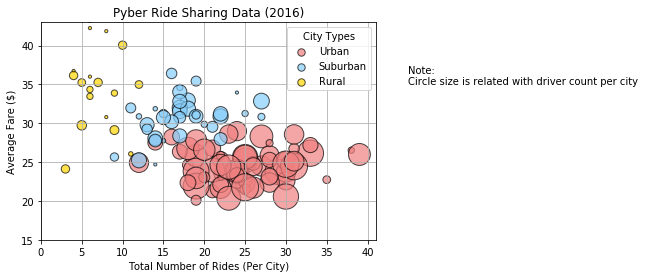

In [2]:
# Obtain the x and y coordinates for each of the three city types

#Urban x, y, and z coordinates
urban_row = city_ride_df.loc[city_ride_df["type"] == "Urban"]
urban_col = urban_row.groupby("city")
total_rides_urban_x = urban_col["ride_id"].count()
avg_fare_urban_y = urban_col["fare"].mean()
total_drivers_urban_z = urban_col["driver_count"].mean()

#Suburban x, y and z coordinates
sub_row = city_ride_df.loc[city_ride_df["type"] == "Suburban"]
sub_col = sub_row.groupby("city")
total_rides_sub_x = sub_col["ride_id"].count()
avg_fare_sub_y = sub_col["fare"].mean()
total_drivers_sub_z = sub_col["driver_count"].mean()

#Rural x, y and z coordinates
rural_row = city_ride_df.loc[city_ride_df["type"] == "Rural"]
rural_col = rural_row.groupby("city")
total_rides_rural_x = rural_col["ride_id"].count()
avg_fare_rural_y = rural_col["fare"].mean()
total_drivers_rural_z = rural_col["driver_count"].mean()


# Build the scatter plots for each city types                               
urban = plt.scatter(total_rides_urban_x, avg_fare_urban_y, s= total_drivers_urban_z*10, marker = "o", color = "LightCoral", edgecolor = 'black', label = "Urban", alpha = .70, linewidth=1)
suburban = plt.scatter(total_rides_sub_x, avg_fare_sub_y, s= total_drivers_sub_z*10, marker = "o", color = "LightSkyBlue", edgecolor = 'black', label = "Suburban", alpha = .70, linewidth=1)
rural = plt.scatter(total_rides_rural_x, avg_fare_rural_y, s= total_drivers_rural_z*10, marker = "o", color = "Gold", edgecolor = 'black', label = "Rural", alpha = .70, linewidth=1)


#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

legend = plt.legend(handles = [urban, suburban, rural],loc="best")
legend.set_title("City Types")
legend.legendHandles[0]._sizes = [55]
legend.legendHandles[1]._sizes = [55]
legend.legendHandles[2]._sizes = [55]

plt.grid()
plt.ylim (15,43)
plt.xlim(0,41)

# Incorporate a text label regarding circle size
plt.text(45,35,"Note:\nCircle size is related with driver count per city")

# Save Figure
plt.savefig("bubble_plot.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

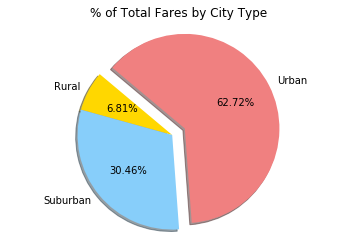

In [4]:
# Calculate Type Percents
total_fares_type = city_ride_df.groupby("type")["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(total_fares_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("total_fares_type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

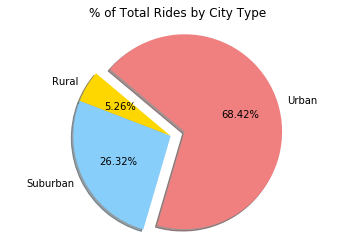

In [7]:
# Calculate Ride Percents
total_rides_type = city_ride_df.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(total_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
          
# Save Figure
plt.savefig("total_rides_type.png")

In [6]:
# Show Figure
plt.show()

## Total Drivers by City Type

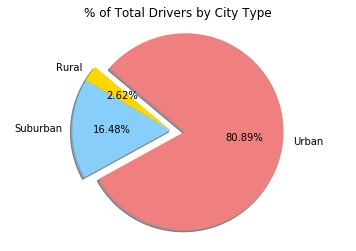

In [12]:
# Calculate Driver Percents
total_drivers_type = city_data_to_load.groupby("type")["driver_count"].sum()

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(total_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("total_drivers_type.png")

In [9]:
# Show Figure
plt.show()